<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 2) 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [1]:
# type your code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

Load the csv file and set the first column as index

In [2]:
# type your code here
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [4]:
df.Year = df.Year.astype(object)

In [5]:
df.dtypes

Car_Name          object
Year              object
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df.shape

(301, 9)

In [7]:
df.groupby('Year')['Car_Name'].count()

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Car_Name, dtype: int64

In [8]:
year_group = df.groupby('Year')
years = list(year_group.indices.keys())
counts = list(year_group['Car_Name'].count())

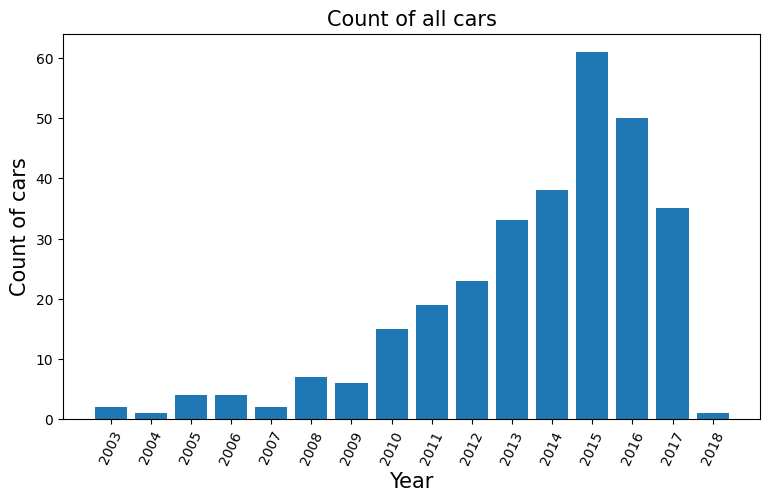

In [9]:
plt.figure(figsize=(9,5))
plt.bar(years,counts)
plt.title("Count of all cars",fontsize=15)
plt.ylabel("Count of cars",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.xticks(rotation=65,ticks=years)
plt.show()

In [10]:
year_group['Seller_Type'].value_counts()

Year  Seller_Type
2003  Dealer          1
      Individual      1
2004  Dealer          1
2005  Individual      2
      Dealer          2
2006  Individual      2
      Dealer          2
2007  Individual      2
2008  Individual      5
      Dealer          2
2009  Dealer          5
      Individual      1
2010  Dealer         10
      Individual      5
2011  Dealer         13
      Individual      6
2012  Dealer         16
      Individual      7
2013  Dealer         19
      Individual     14
2014  Dealer         28
      Individual     10
2015  Dealer         46
      Individual     15
2016  Dealer         31
      Individual     19
2017  Dealer         18
      Individual     17
2018  Dealer          1
Name: count, dtype: int64

In [11]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [12]:
# type your code here

In [15]:
df_num = df.select_dtypes(include=np.number).drop('Selling_Price',axis=1)

In [16]:
df_cat = df.select_dtypes(include="object")

In [20]:
df_num

,Present_Price,Kms_Driven,Owner
0,5.59,27000,0
1,9.54,43000,0
2,9.85,6900,0
3,4.15,5200,0
4,6.87,42450,0
...,...,...,...
296,11.60,33988,0
297,5.90,60000,0
298,11.00,87934,0
299,12.50,9000,0


In [21]:
df_cat

,Car_Name,Year,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,Petrol,Dealer,Manual
1,sx4,2013,Diesel,Dealer,Manual
2,ciaz,2017,Petrol,Dealer,Manual
3,wagon r,2011,Petrol,Dealer,Manual
4,swift,2014,Diesel,Dealer,Manual
...,...,...,...,...,...
296,city,2016,Diesel,Dealer,Manual
297,brio,2015,Petrol,Dealer,Manual
298,city,2009,Petrol,Dealer,Manual
299,city,2017,Diesel,Dealer,Manual


In [24]:
df_encoded = pd.get_dummies(df_cat,drop_first=True)

In [25]:
X = pd.concat([df_num,df_encoded],axis=1)
y = df.Selling_Price

In [27]:
import statsmodels.api as sm

In [28]:
X = sm.add_constant(X)

In [29]:
X

,const,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.0,5.59,27000,0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1,1.0,9.54,43000,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
2,1.0,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
3,1.0,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1.0,6.87,42450,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1.0,11.60,33988,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
297,1.0,5.90,60000,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
298,1.0,11.00,87934,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,1.0,12.50,9000,0,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [31]:
model = sm.OLS(y,X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df_numeric.boxplot()
plt.show()

NameError: name 'df_numeric' is not defined

In [ ]:
# type your code here
sns.boxplot(df.Selling_Price)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [ ]:
# type your code here